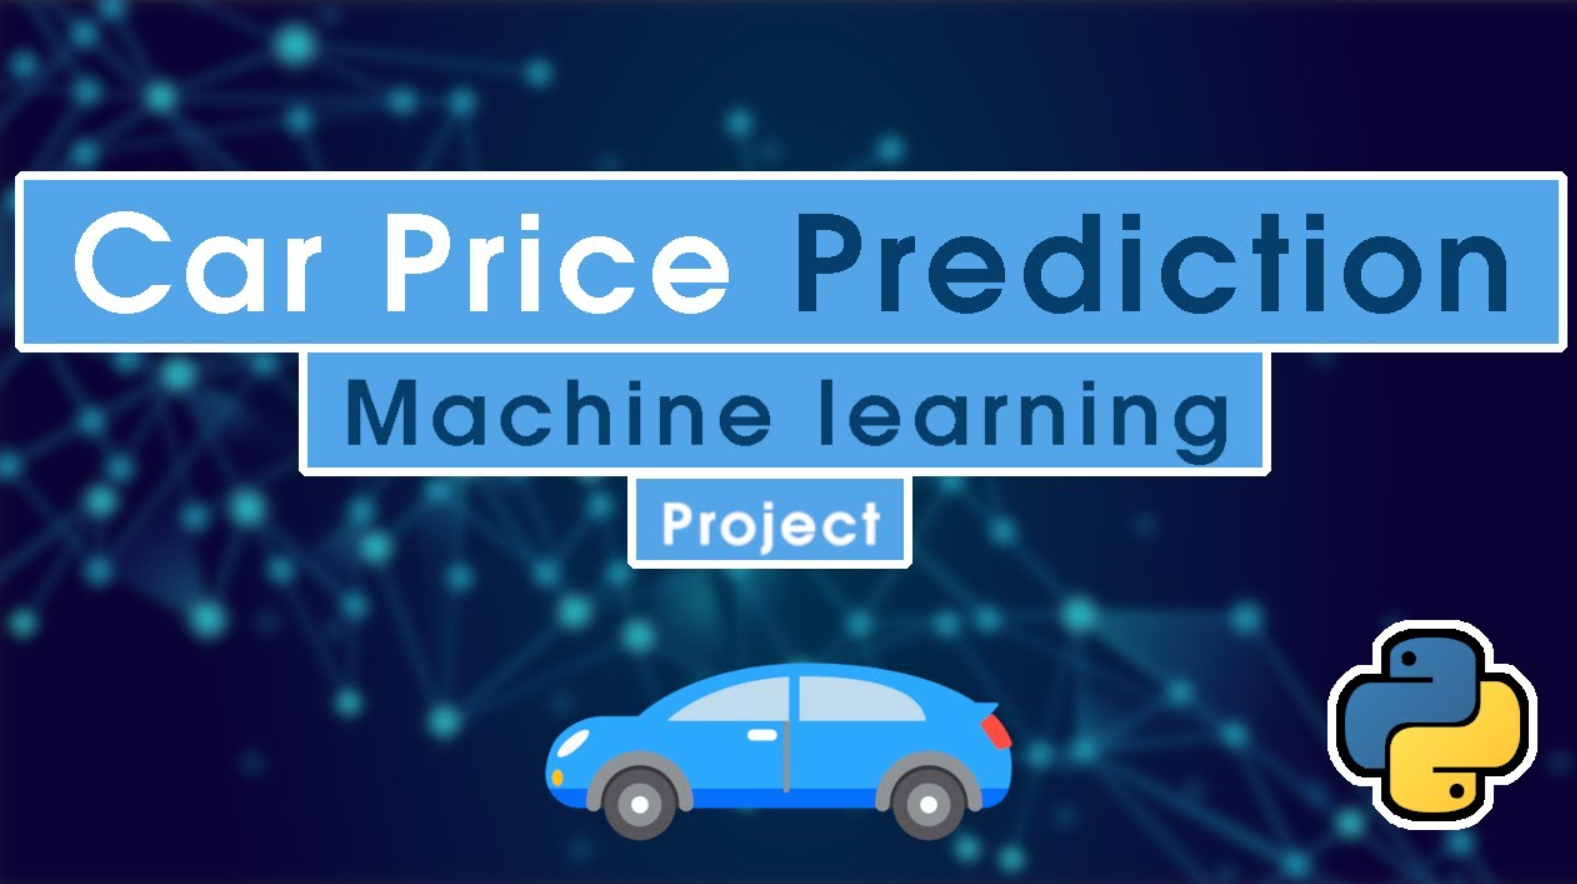

2:44 AM <br>
$8^{th}$ August, 2024

# <span style='color:orange'>Car Price Prediction <span> 

## From different Regression models <br>
<span style='color:green'>(using Scikit-learn) </span> <br><br>
**Linear Regression (OLS)** <br>
**Linear Regression (Stochastic Gradient Descent)** <br>
**Rigid Regression (L2)** <br>
**Lasso Regression (L1)** <br>
**ElasticNet Regression**

## <span style='color:yellow'>Data Import<span>

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [241]:
df = pd.read_csv("../CSVFiles/CarPrice_Assignment.csv")

In [242]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## <span style='color:yellow'>DataPreprocessing<span>

In [288]:
#shape of database
df.shape

(205, 26)

In [289]:
# database description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [290]:
#checking null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [291]:
#checking duplicate values
df.duplicated().sum()

0

In [292]:
df.select_dtypes("number").columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [293]:
categoricalCols = df.select_dtypes("object").columns
print(categoricalCols)

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [294]:
#creating new dataframe
new_df = df.copy()


In [295]:
#for identifiying the values of categorical columns that have maximum 3 unique values
needColumns = []
for i in range(len(categoricalCols)):
    col_len = len(df[categoricalCols[i]].unique())
    if col_len<=3:
        needColumns.append(categoricalCols[i])
    else:
        new_df.drop(columns=[categoricalCols[i]], axis=1, inplace=True)
        print("Dropped column : ", categoricalCols[i])

print(needColumns)

Dropped column :  CarName
Dropped column :  carbody
Dropped column :  enginetype
Dropped column :  cylindernumber
Dropped column :  fuelsystem
['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation']


In [296]:
print("old df shape ", df.shape)
print("new df shape ", new_df.shape)


old df shape  (205, 26)
new df shape  (205, 21)


<br>
<br>
<span style='color:yellow'>Removing the columns that we think is not necessary</span>
<br>
<br>

In [297]:
# car_id
new_df.drop(columns=['car_ID'], axis=1, inplace=True)

In [298]:
new_df.shape

(205, 20)

In [299]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

<br>
<br>
<span style='color:yellow'>Observing outliers using (IQR)</span>
<br>
Using the interquartile range
The interquartile range (IQR) tells you the range of the middle half of your dataset. You can use the IQR to create “fences” around your data and then define outliers as any values that fall outside those fences.
<br>

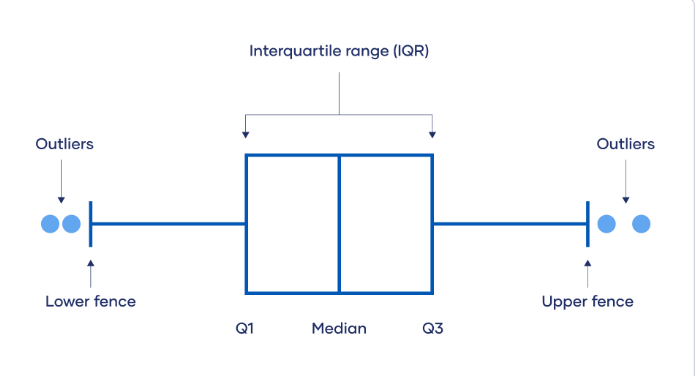

source: https://www.scribbr.com/statistics/outliers/

In [300]:
new_df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,rwd,front,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,rwd,front,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,fwd,front,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,4wd,front,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [301]:
new_df = new_df.sort_values(by='price')

In [302]:
# from price
price_stats = df.price.describe()
price_stats

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [303]:
Q1 = price_stats['25%']
Q3 = price_stats['75%']


In [304]:
import seaborn as sns

<Axes: xlabel='price'>

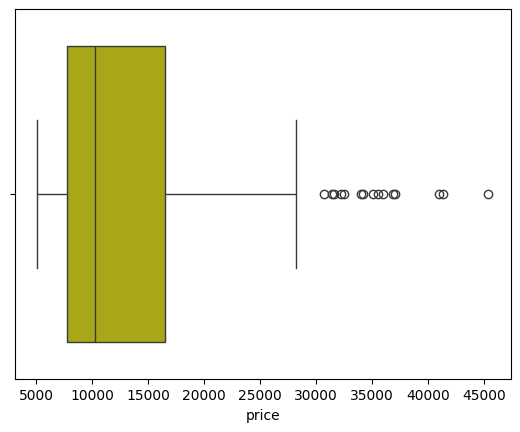

In [305]:
sns.boxplot(df.price, color='y', orient='h')

Interquartile range method

Sort your data from low to high <br>
Identify the first quartile (Q1), the median, and the third quartile (Q3). <br>
Calculate your IQR = Q3 – Q1 <br>
Calculate your upper fence = Q3 + (1.5 * IQR) <br>
Calculate your lower fence = Q1 – (1.5 * IQR) <br>
Use your fences to highlight any outliers, all values that fall outside your fences. <br>
Your outliers are any values greater than your upper fence or less than your lower fence <br>

In [306]:
IQR = Q3 - Q1
u_fence = Q3 + (1.5 * IQR)
l_fence = Q1 - (1.5 * IQR)
print("Upper fence : ",u_fence)
print("Lower fence : ",l_fence)


Upper fence :  29575.5
Lower fence :  -5284.5


In [307]:
#outliers prices
outliers = new_df[(new_df['price'] < l_fence) | (df['price'] > u_fence)]

print("Number of outliers : ", len(outliers))


# Dropping outliers by index
new_df.drop(outliers.index, axis=0, inplace=True)




Number of outliers :  15


C:\Users\Saurav Karki\AppData\Local\Temp\ipykernel_13716\3694025155.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = new_df[(new_df['price'] < l_fence) | (df['price'] > u_fence)]


In [308]:
new_df.shape

(190, 20)

<Axes: xlabel='price'>

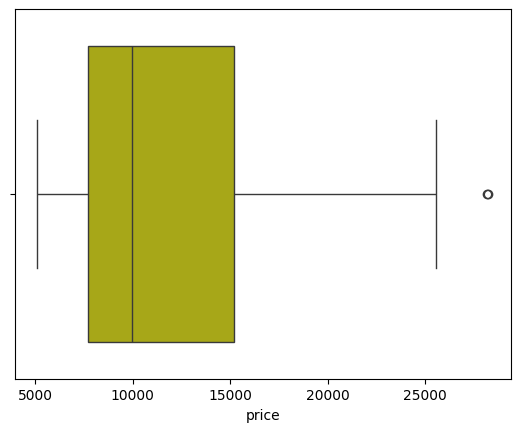

In [309]:
#checking again
sns.boxplot(new_df.price, color='y', orient='h')

<br>
<br>
<span style='color:yellow'>Handling categorical data with booleans</span>
<br>
<br>

In [310]:
test_df = pd.get_dummies(new_df.fueltype, prefix='fueltype')

In [311]:
test_df.head(2)

,fueltype_diesel,fueltype_gas
138,False,True
18,False,True


In [312]:
# doing same thing for all categorical data
print(needColumns)

['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation']


In [314]:
# Initialize an empty DataFrame
new_test_df = pd.DataFrame()

# Loop through the columns and create dummy variables
for col in needColumns:
    dft1 = pd.get_dummies(new_df[col], prefix=col)
    new_test_df = pd.concat([new_test_df, dft1], axis=1)
    
    
new_columns = new_test_df.columns
new_test_df.shape
    

(190, 10)

In [315]:
#joining test df with new_df
new_df = pd.concat([new_df, new_test_df], axis=1)

In [316]:
new_df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front
138,2,gas,std,two,fwd,front,93.7,156.9,63.4,53.7,...,False,True,True,False,False,True,False,True,False,True
18,2,gas,std,two,fwd,front,88.4,141.1,60.3,53.2,...,False,True,True,False,False,True,False,True,False,True
50,1,gas,std,two,fwd,front,93.1,159.1,64.2,54.1,...,False,True,True,False,False,True,False,True,False,True
150,1,gas,std,two,fwd,front,95.7,158.7,63.6,54.5,...,False,True,True,False,False,True,False,True,False,True
76,2,gas,std,two,fwd,front,93.7,157.3,64.4,50.8,...,False,True,True,False,False,True,False,True,False,True


In [317]:
#droping the not necessary columns
for col in needColumns:
    new_df.drop(col, axis=1, inplace=True)
    print("Droped column : ", col)

Droped column :  fueltype
Droped column :  aspiration
Droped column :  doornumber
Droped column :  drivewheel
Droped column :  enginelocation


In [318]:
new_df.shape

(190, 25)

In [324]:
new_cols_list = new_columns.tolist()
new_cols_list

['fueltype_diesel',
 'fueltype_gas',
 'aspiration_std',
 'aspiration_turbo',
 'doornumber_four',
 'doornumber_two',
 'drivewheel_4wd',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation_front']

In [325]:
#converting true false to 0,1
new_df[new_cols_list] = new_df[new_cols_list].astype(int)

In [326]:
new_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front
138,2,93.7,156.9,63.4,53.7,2050,97,3.62,2.36,9.0,...,0,1,1,0,0,1,0,1,0,1
18,2,88.4,141.1,60.3,53.2,1488,61,2.91,3.03,9.5,...,0,1,1,0,0,1,0,1,0,1
50,1,93.1,159.1,64.2,54.1,1890,91,3.03,3.15,9.0,...,0,1,1,0,0,1,0,1,0,1
150,1,95.7,158.7,63.6,54.5,1985,92,3.05,3.03,9.0,...,0,1,1,0,0,1,0,1,0,1
76,2,93.7,157.3,64.4,50.8,1918,92,2.97,3.23,9.4,...,0,1,1,0,0,1,0,1,0,1


<br>
<br>
<span style='color:yellow'>Completed preprocessing </span>
<br>
<br>

## <span style='color:yellow'>Data Visulization<span>

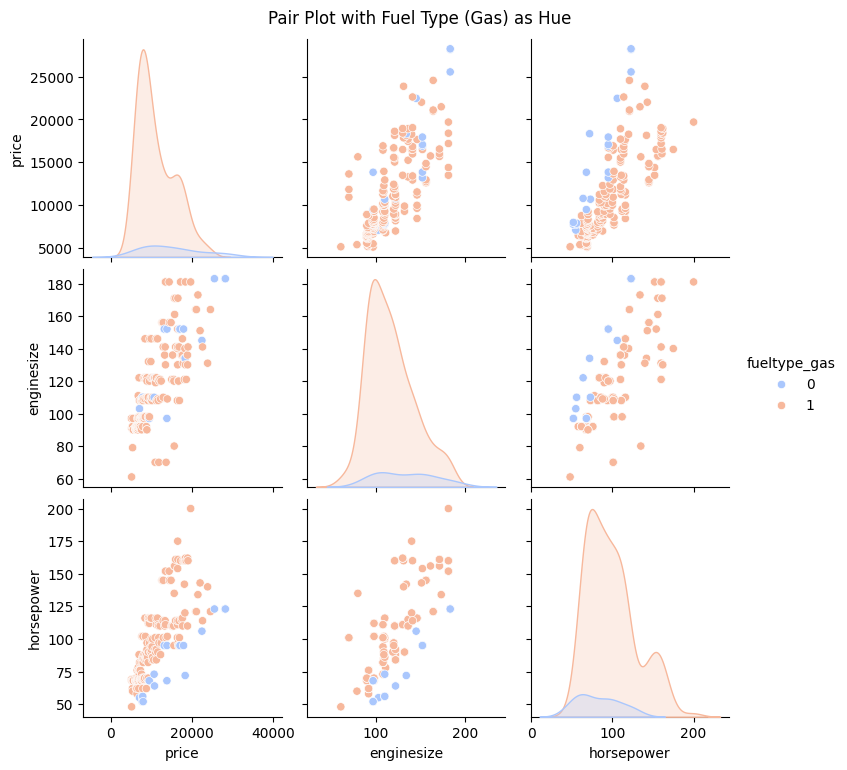

In [330]:
sns.pairplot(new_df[['price', 'enginesize', 'horsepower', 'fueltype_gas']],
             hue='fueltype_gas', dropna=True, palette='coolwarm')

plt.suptitle('Pair Plot with Fuel Type (Gas) as Hue', y=1.02)
plt.show()

## <span style='color:yellow'>Regression Models<span>

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [349]:
X = new_df.drop(['price'], axis=1)
y = new_df['price']

In [350]:
print(X.shape)
print(y.shape)

(190, 24)
(190,)


In [351]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### <span style='color:orange'>Linear Regresstion (OLS)<span>

In [335]:
from sklearn.linear_model import LinearRegression

In [352]:
lr = LinearRegression()

In [354]:
lr.fit(X_train,y_train)

LinearRegression()

In [355]:
y_pred_lr = lr.predict(X_test)

In [357]:
r2_lr =  r2_score(y_test,y_pred_lr)

In [358]:
print("r2_score from Linear Regression : ", r2_lr)

r2_score from Linear Regression :  0.7658855041429267


In [532]:
lr.intercept_

-49646.039961945855

In [533]:
lr.coef_

array([ 2.30206600e+01,  4.66819437e+01, -6.58641887e+01,  7.97731102e+02,
        1.35432968e+02,  1.05681156e+00,  5.43576244e+01, -2.47613425e+03,
       -2.09694487e+03,  9.38890823e+02,  1.73985521e+01,  7.09033321e-01,
       -4.15198113e+02,  2.15685947e+02, -5.01923027e+03,  5.01923027e+03,
       -1.15520843e+03,  1.15520843e+03,  1.24647038e+02, -1.24647038e+02,
       -7.53792707e+02, -7.35868722e+02,  1.48966143e+03,  0.00000000e+00])

<span style='color:green'>R2 score tells us how much of the variation of a dependent variable is explained by an independent variable in a regression model.<span>

### <span style='color:orange'>Linear Regresstion (SGD)<span>

In [417]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [430]:
# making the dependent values from -3 to 3
scaler = StandardScaler()
X_scaler_train = scaler.fit_transform(X_train)
X_scaler_test = scaler.fit_transform(X_test)


In [434]:
X_scaler_train[0]

array([-0.65186737, -0.50300076, -0.59843471, -0.6615429 , -0.42806747,
       -0.47842955, -0.30199865, -0.16082504,  0.3549636 ,  2.72476822,
       -1.35140205, -1.30213486,  1.96470036,  2.40138557,  2.64575131,
       -2.64575131,  0.4958847 , -0.4958847 ,  0.85280287, -0.85280287,
       -0.23570226,  0.81873663, -0.73167857,  0.        ])

In [435]:
print(X_scaler_train[0].max())
print(X_scaler_train[0].min())

2.724768220293959
-2.6457513110645903


In [461]:
sgd = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)

In [462]:
sgd.fit(X_scaler_train,y_train)

SGDRegressor(learning_rate='constant')

In [463]:
y_pred_sgd = sgd.predict(X_scaler_test)

In [464]:
r2_sgd =  r2_score(y_test,y_pred_sgd)

In [465]:
print("r2_score from Linear Regression (Stochastic GD): ", r2_sgd)

r2_score from Linear Regression (Stochastic GD):  0.6821768179826746


In [485]:
sgd.predict([X_scaler_test[6]])

array([7144.86088617])

### <span style='color:orange'>Rigid Regression (L2 Regularization)<span>

In [494]:
from sklearn.linear_model import Ridge

In [521]:
rg = Ridge(alpha=2)

In [522]:
rg.fit(X_train,y_train)

Ridge(alpha=2)

In [523]:
y_pred_rg = rg.predict(X_test)

In [524]:
r2_rg = r2_score(y_test,y_pred_rg)

In [525]:
print("r2_score from Rigid Regression : ", r2_rg)

r2_score from Rigid Regression :  0.7654461715573375


### <span style='color:orange'>Lasso Regression (L1 Regularization)<span>

In [541]:
from sklearn.linear_model import Lasso

In [619]:
lso = Lasso(alpha=20)

In [620]:
lso.fit(X_train,y_train)

Lasso(alpha=20)

In [621]:
y_pred_lso = lso.predict(X_test)

In [622]:
r2_lso = r2_score(y_test,y_pred_lso)

In [623]:
print("r2_score from Lasso Regression : ", r2_lso)

r2_score from Lasso Regression :  0.7635064477867669


In [624]:
lso.coef_

array([-0.00000000e+00,  4.74696913e+01, -6.09903732e+01,  7.92889717e+02,
        1.14434310e+02,  1.31772445e+00,  3.91733819e+01, -1.51571697e+03,
       -1.69743236e+03,  2.38894724e+02,  3.19908932e+01,  8.16694885e-01,
       -3.08884775e+02,  1.54222573e+02, -0.00000000e+00,  0.00000000e+00,
       -8.97016426e+02,  0.00000000e+00,  1.63920445e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.88915095e+03,  0.00000000e+00])

### <span style='color:orange'>ElasticNet Regression <span>

In [559]:
from sklearn.linear_model import ElasticNet

In [630]:
enr = ElasticNet(alpha=0.9, l1_ratio=0.9)

In [631]:
enr.fit(X_train,y_train)

ElasticNet(alpha=0.9, l1_ratio=0.9)

In [632]:
y_pred_enr = enr.predict(X_test)

In [633]:
r2_enr = r2_score(y_test,y_pred_enr)

In [634]:
print("r2_score from ElasticNet Regression : ", r2_enr)

r2_score from ElasticNet Regression :  0.7507067745175434


## <span style='color:yellow'>Prediction<span>

In [673]:
new_car_details  = [
    0.00,          # symboling
    95.70,         # wheelbase
    166.30,        # carlength
    64.40,         # carwidth
    52.80,         # carheight
    2275.00,       # curbweight
    110.00,        # enginesize
    3.27,          # boreratio
    3.35,          # stroke
    22.50,         # compressionratio
    56.00,         # horsepower
    4500.00,       # peakrpm
    38.00,         # citympg
    47.00,         # highwaympg
    1.00,          # fueltype_diesel
    0.00,          # fueltype_gas
    1.00,          # aspiration_std
    0.00,          # aspiration_turbo
    1.00,          # doornumber_four
    0.00,          # doornumber_two
    0.00,          # drivewheel_4wd
    1.00,          # drivewheel_fwd
    0.00,          # drivewheel_rwd
    1.00           # enginelocation_front
]

len(new_car_details)

24

In [678]:

print(new_car_details)
print("Actual Result : ", y_train.iloc[0])

[0.0, 95.7, 166.3, 64.4, 52.8, 2275.0, 110.0, 3.27, 3.35, 22.5, 56.0, 4500.0, 38.0, 47.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0]
Actual Result :  7788.0


In [683]:
#from Linear Regression
y_lr = lr.predict([new_car_details])
print("Actual Result : ", y_train.iloc[0])
print("Predicted Car Price Using Linear Regression (OLS) is :", y_lr[0])

Predicted Car Price Using Linear Regression (OLS) is : 8518.875010709911


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [696]:
#from stochastic gradient descent
y_sgd = sgd.predict([X_scaler_test[0]])
print("Actual Result : ", y_test.iloc[0])
print("Predicted Car Price Using Linear Regression (SGD) is :", y_sgd[0])

Actual Result :  18920.0
Predicted Car Price Using Linear Regression (SGD) is : 19722.86001730481


In [697]:
#from Eidge Regression
y_rg = rg.predict([new_car_details])
print("Actual Result : ", y_train.iloc[0])
print("Predicted Car Price Using Ridge is :", y_rg[0])

Actual Result :  7788.0
Predicted Car Price Using Ridge is : 8991.82480457452


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


In [700]:
#from Lasso Regression
y_lso = lso.predict([new_car_details])
print("Actual Result : ", y_train.iloc[0])
print("Predicted Car Price Using Linear Regression (SGD) is :", y_lso[0])

Actual Result :  7788.0
Predicted Car Price Using Linear Regression (SGD) is : 9034.00321460567


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [701]:
#from ElasticNet Regression
y_enr = enr.predict([new_car_details])
print("Actual Result : ", y_train.iloc[0])
print("Predicted Car Price Using Linear Regression (SGD) is :", y_enr[0])

Actual Result :  7788.0
Predicted Car Price Using Linear Regression (SGD) is : 9353.827190812874


D:\Applications\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


## <span style='color:pink'>See You Soon 👋👋<span>